In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import statsmodels.api as sm

In [2]:
original_df = pd.read_excel("../data/High_Note_data_csv.xlsx")
original_df

C:\Users\Arushi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,net_user,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,...,delta2_avg_friend_age,delta2_avg_friend_male,delta2_friend_country_cnt,delta2_subscriber_friend_cnt,delta2_songsListened,delta2_lovedTracks,delta2_posts,delta2_playlists,delta2_shouts,delta2_good_country
0,tinaj5920,NaN,0.0,20.0,30.285714,0.736842,14.0,1.0,8414,348,...,0.357143,0.000000,1.0,1.0,159.0,1.0,0.0,0.0,NaN,0.0
1,tinalabina,NaN,NaN,3.0,30.500000,0.333333,1.0,0.0,1943,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,tinamachine,22.0,0.0,8.0,22.571429,0.428571,1.0,0.0,9687,194,...,0.571429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,tinamarriott,31.0,0.0,0.0,NaN,NaN,0.0,0.0,26863,12,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,tinamausiii,NaN,NaN,1.0,NaN,1.000000,1.0,0.0,187,0,...,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107208,zuliano,27.0,1.0,8.0,27.666667,0.666667,2.0,0.0,12511,1152,...,0.000000,-0.095238,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
107209,zuljinn666,NaN,NaN,2.0,19.000000,1.000000,1.0,0.0,5917,17,...,0.000000,0.000000,0.0,0.0,520.0,0.0,0.0,0.0,NaN,NaN
107210,zvoncica1986,25.0,0.0,19.0,25.384615,0.388889,8.0,2.0,20877,158,...,0.076923,0.000000,0.0,-1.0,3632.0,14.0,0.0,0.0,NaN,0.0
107211,zytrock,26.0,0.0,83.0,29.923077,0.820896,25.0,19.0,130029,208,...,0.660377,0.017559,2.0,0.0,12824.0,11.0,0.0,0.0,NaN,0.0


In [3]:
correlations = original_df.corr()
correlations

C:\Users\Arushi Jain\AppData\Local\Temp\ipykernel_26980\1834376055.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = original_df.corr()


,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,...,delta2_avg_friend_age,delta2_avg_friend_male,delta2_friend_country_cnt,delta2_subscriber_friend_cnt,delta2_songsListened,delta2_lovedTracks,delta2_posts,delta2_playlists,delta2_shouts,delta2_good_country
age,1.000000,0.176652,-0.042594,0.675648,0.076685,-0.047599,0.061620,0.007474,0.047596,0.001305,...,-0.006524,-0.007251,-0.021923,-0.007520,-0.029266,0.005387,0.006409,0.004941,NaN,0.005676
male,0.176652,1.000000,-0.006664,0.042720,0.053784,-0.043436,0.002454,0.111040,0.021344,0.005996,...,0.000713,-0.009686,0.006969,0.005745,0.049255,0.012108,-0.001239,0.003163,NaN,0.005951
friend_cnt,-0.042594,-0.006664,1.000000,-0.051803,-0.017637,0.736999,0.762359,0.239423,0.172177,0.069644,...,-0.006975,0.006134,0.109309,-0.171244,0.126967,0.074367,0.018766,0.000168,NaN,-0.006108
avg_friend_age,0.675648,0.042720,-0.051803,1.000000,0.178439,-0.041052,0.056404,-0.021025,0.036884,0.000682,...,-0.059390,-0.003211,-0.024993,-0.010321,-0.041001,-0.000284,-0.000051,-0.003610,NaN,0.004724
avg_friend_male,0.076685,0.053784,-0.017637,0.178439,1.000000,-0.030779,0.003600,0.005382,-0.003716,0.001747,...,0.002943,-0.070730,0.000562,-0.002678,-0.004435,-0.000924,-0.001475,-0.000313,NaN,-0.001105
friend_country_cnt,-0.047599,-0.043436,0.736999,-0.041052,-0.030779,1.000000,0.544451,0.359828,0.261942,0.105666,...,-0.011452,0.009961,0.120662,-0.091163,0.183205,0.104423,0.033242,0.001055,NaN,-0.005694
subscriber_friend_cnt,0.061620,0.002454,0.762359,0.056404,0.003600,0.544451,1.000000,0.159949,0.171599,0.076622,...,-0.009257,0.003221,0.073837,-0.220231,0.096857,0.082653,0.021900,0.001118,NaN,-0.003307
songsListened,0.007474,0.111040,0.239423,-0.021025,0.005382,0.359828,0.159949,1.000000,0.256210,0.089079,...,-0.004768,0.001328,0.056772,-0.024401,0.329394,0.057044,0.023994,0.001821,NaN,0.001871
lovedTracks,0.047596,0.021344,0.172177,0.036884,-0.003716,0.261942,0.171599,0.256210,1.000000,0.045959,...,-0.009789,0.003752,0.057392,-0.017228,0.121800,0.223209,0.016517,0.004878,NaN,-0.006651
posts,0.001305,0.005996,0.069644,0.000682,0.001747,0.105666,0.076622,0.089079,0.045959,1.000000,...,-0.001610,0.000549,0.010192,0.002758,0.044304,0.016649,0.232586,0.000534,NaN,0.002268


In [4]:
for index, row in correlations.iterrows():
    for col in correlations.columns:
        if index != col:
            if abs(row[col]) > 0.7:
                print(index, col)

friend_cnt friend_country_cnt
friend_cnt subscriber_friend_cnt
friend_country_cnt friend_cnt
subscriber_friend_cnt friend_cnt
playlists delta2_playlists
shouts delta1_shouts
delta1_shouts shouts
delta2_playlists playlists


In [3]:
demsoc = ['age', 'male', 'good_country', 'friend_country_cnt', 'subscriber_friend_cnt', 'tenure']
eng_cum = ['songsListened', 'lovedTracks', 'posts', 'playlists', 'shouts']
delta1_demsoc = ['delta1_friend_country_cnt', 'delta1_subscriber_friend_cnt']
delta1_eng = ['delta1_songsListened', 'delta1_lovedTracks', 'delta1_posts', 'delta1_playlists', 'delta1_shouts']
delta2_demsoc = ['delta2_friend_cnt','delta2_avg_friend_age', 'delta2_avg_friend_male', 'delta2_good_country',
       'delta2_friend_country_cnt', 'delta2_subscriber_friend_cnt']
delta2_eng = ['delta2_songsListened', 'delta2_lovedTracks', 'delta2_posts', 'delta2_playlists', 'delta2_shouts']
output = ['adopter']

In [13]:
def trainLogit(original_df, features, output):
    df = original_df.copy(deep=True)
    df = df.dropna(subset=features)
    x = df[features]
    y = df[output]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)
    model = sm.Logit(y_train, x_train).fit()
    print(model.summary())
    predictions = model.predict(x_test) > 0.5
    print(metrics.classification_report(y_test, predictions))

In [14]:
trainLogit(original_df, demsoc + eng_cum + delta1_demsoc + delta1_eng, output)

Optimization terminated successfully.
         Current function value: 0.287129
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                adopter   No. Observations:                36258
Model:                          Logit   Df Residuals:                    36240
Method:                           MLE   Df Model:                           17
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                -0.03440
Time:                        13:42:34   Log-Likelihood:                -10411.
converged:                       True   LL-Null:                       -10064.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -0.0821      0.002    -34.732      0.000

In [9]:
# Demographic + Social Variables
trainLogit(original_df, demsoc, output)

Optimization terminated successfully.
         Current function value: 0.292343
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                adopter   No. Observations:                34234
Model:                          Logit   Df Residuals:                    34225
Method:                           MLE   Df Model:                            8
Date:                Fri, 21 Oct 2022   Pseudo R-squ.:                -0.02644
Time:                        22:05:00   Log-Likelihood:                -10008.
converged:                       True   LL-Null:                       -9750.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       0.0166      0.004      3.905      0.000       0.008       0.

In [13]:
# Engagement Variables

trainLogit(original_df, eng_cum, output)

Optimization terminated successfully.
         Current function value: 0.534143
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                adopter   No. Observations:                78964
Model:                          Logit   Df Residuals:                    78959
Method:                           MLE   Df Model:                            4
Date:                Fri, 21 Oct 2022   Pseudo R-squ.:                  -1.197
Time:                        22:07:43   Log-Likelihood:                -42178.
converged:                       True   LL-Null:                       -19200.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
songsListened -4.202e-05   7.31e-07    -57.440      0.000   -4.35e-05   -4.06e-05
lovedTracks      -0.

C:\Users\Arushi Jain\.julia\conda\3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [11]:
# Delta Demographic + Social Variables

trainLogit(original_df, delta1_demsoc, output)

Optimization terminated successfully.
         Current function value: 0.620857
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                adopter   No. Observations:                45460
Model:                          Logit   Df Residuals:                    45454
Method:                           MLE   Df Model:                            5
Date:                Fri, 21 Oct 2022   Pseudo R-squ.:                  -1.234
Time:                        22:06:21   Log-Likelihood:                -28224.
converged:                       True   LL-Null:                       -12632.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
delta1_friend_cnt               -0.0490      0.005    -10.318      0.000

In [12]:
# Delta Engagement Variables

trainLogit(original_df, delta1_eng, output)

Optimization terminated successfully.
         Current function value: 0.666034
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                adopter   No. Observations:                78187
Model:                          Logit   Df Residuals:                    78182
Method:                           MLE   Df Model:                            4
Date:                Fri, 21 Oct 2022   Pseudo R-squ.:                  -1.728
Time:                        22:06:46   Log-Likelihood:                -52075.
converged:                       True   LL-Null:                       -19086.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
delta1_songsListened    -0.0004   7.84e-06    -48.935      0.000      -0.000      -0.000

In [30]:
def trainDT(original_df, features, output):
    df = original_df.copy(deep=True)
    df = df.dropna(subset=features)
    x = df[features]
    y = df[output]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)
    clf = tree.DecisionTreeClassifier(random_state=0)
    params = [{'max_features': [4,5,6,7,8], 'max_depth': [3,4,5], 'min_samples_split': [2,3,4]}]
    gs_clf = GridSearchCV(clf, param_grid=params, cv=5)
    gs_clf.fit(x_train, y_train)
    print(gs_clf.best_params_)
    y_pred = gs_clf.predict(x_test) > 0.5
    print(metrics.classification_report(y_test, y_pred))
    feature_imp = pd.Series(gs_clf.best_estimator_.feature_importances_, index=features).sort_values(ascending=False)
    print(feature_imp)
    return gs_clf.best_estimator_
model = trainDT(original_df, demsoc + eng_cum + delta1_demsoc + delta1_eng, output)

{'max_depth': 3, 'max_features': 7, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11125
           1       0.00      0.00      0.00       961

    accuracy                           0.92     12086
   macro avg       0.46      0.50      0.48     12086
weighted avg       0.85      0.92      0.88     12086

delta1_songsListened            0.500816
subscriber_friend_cnt           0.247020
lovedTracks                     0.179800
delta1_lovedTracks              0.057695
delta1_subscriber_friend_cnt    0.014669
age                             0.000000
shouts                          0.000000
delta1_playlists                0.000000
delta1_posts                    0.000000
delta1_friend_country_cnt       0.000000
playlists                       0.000000
male                            0.000000
posts                           0.000000
songsListened                   0.000000
tenure                          0.00000

C:\Users\Arushi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arushi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arushi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

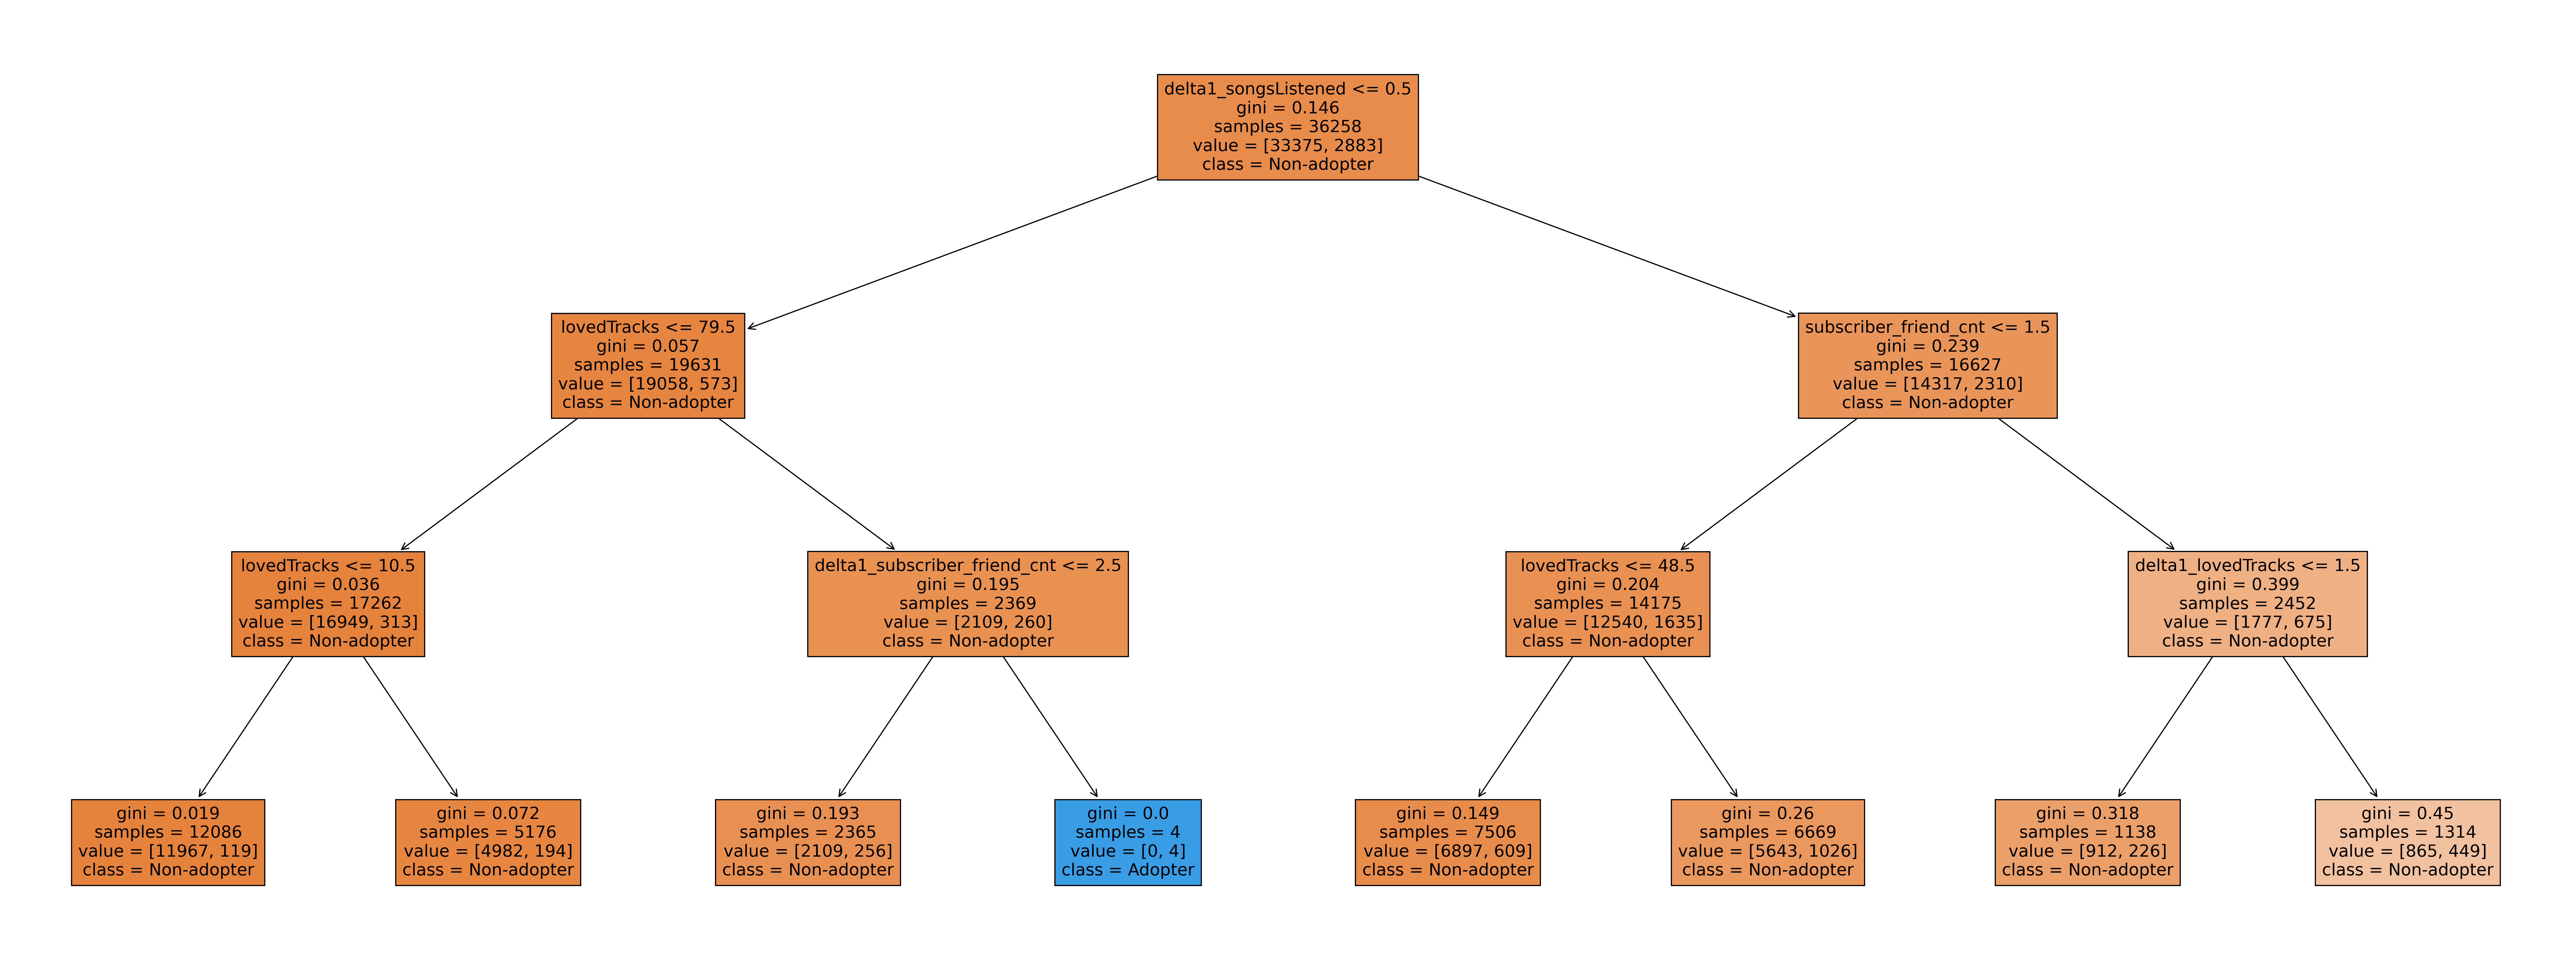

In [34]:
fig, axes = plt.subplots(figsize = (40,15) , dpi=300)
tree.plot_tree(model, feature_names = demsoc + eng_cum + delta1_demsoc + delta1_eng, class_names=["Non-adopter", "Adopter"], filled = True);

In [16]:
def trainRFC(original_df, features, output):
    df = original_df.copy()
    df = df.dropna(subset=features)
    x = df[features]
    y = df[output]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(metrics.classification_report(y_test, y_pred))
    feature_imp = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
    print(feature_imp)

In [17]:
# Demographic + Social Variables
trainRFC(original_df, demsoc, output)

C:\Users\Arushi Jain\AppData\Local\Temp\ipykernel_26980\3803446445.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10470
           1       0.28      0.01      0.02       942

    accuracy                           0.92     11412
   macro avg       0.60      0.50      0.49     11412
weighted avg       0.87      0.92      0.88     11412

avg_friend_age           0.209198
tenure                   0.196647
avg_friend_male          0.145115
friend_cnt               0.142825
age                      0.122013
friend_country_cnt       0.086660
subscriber_friend_cnt    0.057195
good_country             0.023840
male                     0.016507
dtype: float64


In [18]:
# Engagement Variables
trainRFC(original_df, eng_cum, output)

C:\Users\Arushi Jain\AppData\Local\Temp\ipykernel_26980\3803446445.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


              precision    recall  f1-score   support

           0       0.94      0.99      0.96     24585
           1       0.19      0.04      0.06      1737

    accuracy                           0.93     26322
   macro avg       0.56      0.51      0.51     26322
weighted avg       0.89      0.93      0.90     26322

songsListened    0.488273
lovedTracks      0.272573
shouts           0.147144
posts            0.052643
playlists        0.039367
dtype: float64


In [19]:
# Delta Demographic + Social Variables
trainRFC(original_df, delta1_demsoc, output)

C:\Users\Arushi Jain\AppData\Local\Temp\ipykernel_26980\3803446445.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


              precision    recall  f1-score   support

           0       0.92      0.99      0.96     13947
           1       0.20      0.02      0.04      1207

    accuracy                           0.91     15154
   macro avg       0.56      0.51      0.50     15154
weighted avg       0.86      0.91      0.88     15154

delta1_avg_friend_age           0.441167
delta1_avg_friend_male          0.312318
delta1_friend_cnt               0.122338
delta1_subscriber_friend_cnt    0.060822
delta1_friend_country_cnt       0.059596
delta1_good_country             0.003759
dtype: float64


In [20]:
# Delta Engagement Variables
trainRFC(original_df, delta1_eng, output)

C:\Users\Arushi Jain\AppData\Local\Temp\ipykernel_26980\3803446445.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     24334
           1       0.18      0.06      0.09      1729

    accuracy                           0.92     26063
   macro avg       0.56      0.52      0.52     26063
weighted avg       0.89      0.92      0.90     26063

delta1_songsListened    0.710977
delta1_lovedTracks      0.183299
delta1_shouts           0.082657
delta1_posts            0.012892
delta1_playlists        0.010174
dtype: float64


In [116]:
def makeClusters(original_df, features, output):
    df = original_df.copy()
    df = df.dropna(subset=features)
    x = df[features]
    scaler = StandardScaler()
    scaled_features = pd.DataFrame(scaler.fit_transform(x))
    scaled_features.columns = features
    kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 0}
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)
        
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()

    kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
    print(kl.elbow)
    
    if kl.elbow is None:
        return None
    
    kmeans = KMeans(init="random",n_clusters=8,n_init=10,max_iter=300,random_state=0)
    kmeans.fit(scaled_features)
    df["clusters"] = kmeans.labels_
#     score = silhouette_score(x, kmeans.labels_, metric='euclidean')
#     print(score)
    return df
    

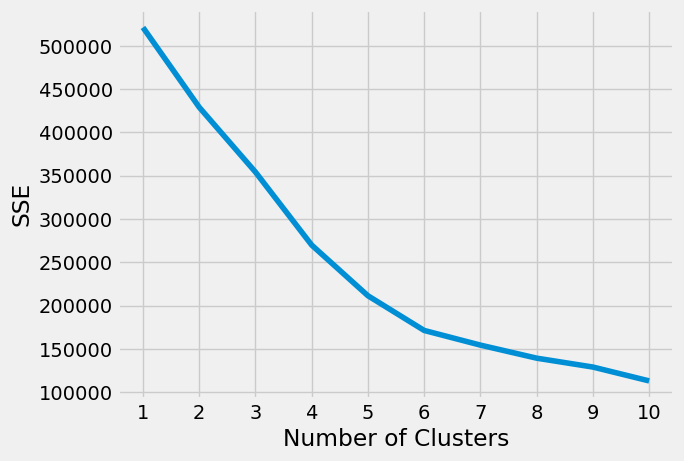

5


In [117]:
df_clusters = makeClusters(original_df, delta1_eng, output)
# if df_clusters is not None:
#     df_clusters.to_excel("./delta1_eng_clusters.xlsx")

In [118]:
df_clusters.groupby("clusters").count()

,net_user,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,...,delta2_avg_friend_age,delta2_avg_friend_male,delta2_friend_country_cnt,delta2_subscriber_friend_cnt,delta2_songsListened,delta2_lovedTracks,delta2_posts,delta2_playlists,delta2_shouts,delta2_good_country
clusters,,,,,,,,,,,,,,,,,,,,,
0,414,283,342,414,395,396,414,414,414,414,...,395,398,414,414,414,414,414,414,0,348
1,94726,47912,58363,94733,74256,79112,94733,94733,94733,94733,...,74038,78823,94726,94726,94726,94726,94726,94726,0,58230
2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
4,301,217,235,301,267,269,301,301,301,301,...,267,271,301,301,301,301,301,301,0,239
5,2,0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,2
6,39,29,33,38,35,35,38,38,39,39,...,36,36,39,39,39,39,39,39,0,31
7,8759,6229,7243,8759,8157,8261,8759,8759,8759,8759,...,8181,8273,8757,8757,8757,8757,8757,8757,0,7285


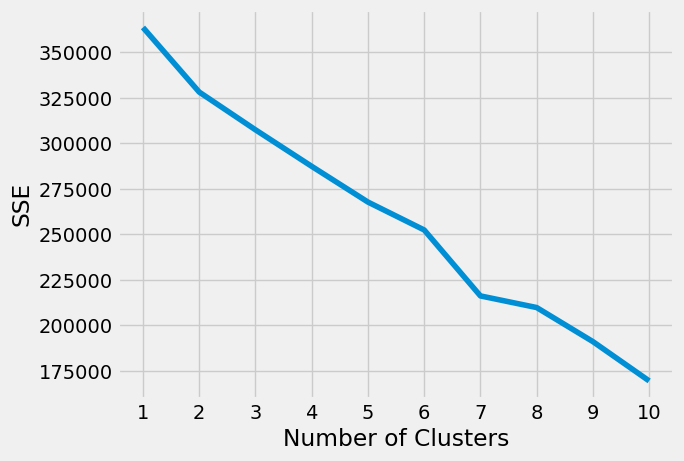

None


C:\Users\Arushi Jain\.julia\conda\3\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


In [119]:
df_clusters = makeClusters(original_df, delta1_demsoc, output)
if df_clusters is not None:
    df_clusters.to_excel("./delta1_demsoc_clusters.xlsx")

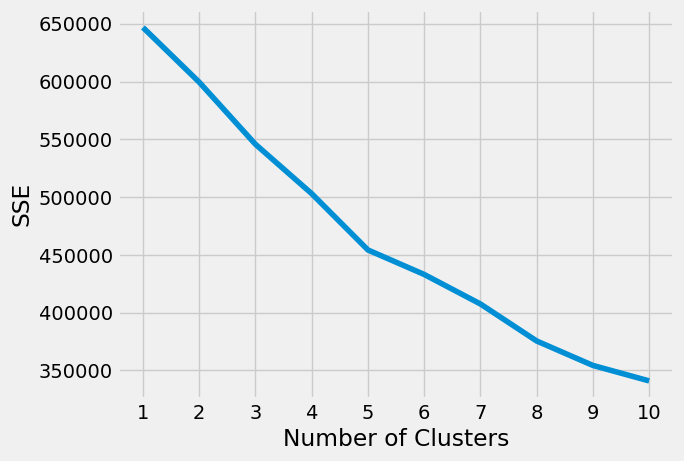

5


In [120]:
df_clusters = makeClusters(original_df, delta1_demsoc+delta1_eng, output)
# if df_clusters is not None:
#     df_clusters.to_excel("./delta1clusters.xlsx")

In [121]:
df_clusters.groupby("clusters").count()

,net_user,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,...,delta2_avg_friend_age,delta2_avg_friend_male,delta2_friend_country_cnt,delta2_subscriber_friend_cnt,delta2_songsListened,delta2_lovedTracks,delta2_posts,delta2_playlists,delta2_shouts,delta2_good_country
clusters,,,,,,,,,,,,,,,,,,,,,
0,50548,40048,46235,50551,50551,50551,50551,50551,50551,50551,...,50306,50351,50545,50545,50545,50545,50545,50545,0,50498
1,203,166,182,203,203,203,203,203,203,203,...,202,202,203,203,203,203,203,203,0,197
2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,3985,3262,3719,3986,3986,3986,3986,3986,3986,3986,...,3978,3981,3986,3986,3986,3986,3986,3986,0,3966
4,51,38,45,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,0,50
5,3,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,0,3
6,4004,3295,3746,4004,4004,4004,4004,4004,4004,4004,...,3995,4000,4003,4003,4003,4003,4003,4003,0,3975
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [122]:
def gmmCluster(original_df, features, output):
    df = original_df.copy()
    df = df.dropna(subset=features)
    x = df[features]
    scaler = StandardScaler()
    scaled_features = pd.DataFrame(scaler.fit_transform(x))
    scaled_features.columns = features
    # start with higher number of clusters
    gmm = GaussianMixture(n_components=8, random_state=75)
    gmm.fit(scaled_features)
    df["clusters"] = gmm.predict(scaled_features)
#     score = silhouette_score(x, kmeans.labels_, metric='euclidean')
#     print(score)
    return df
    

In [123]:
df_clusters = gmmCluster(original_df, delta1_eng, output)
# if df_clusters is not None:
#     df_clusters.to_excel("./delta1clusters.xlsx")

In [124]:
df_clusters.groupby("clusters").count()

,net_user,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,...,delta2_avg_friend_age,delta2_avg_friend_male,delta2_friend_country_cnt,delta2_subscriber_friend_cnt,delta2_songsListened,delta2_lovedTracks,delta2_posts,delta2_playlists,delta2_shouts,delta2_good_country
clusters,,,,,,,,,,,,,,,,,,,,,
0,64510,30325,37287,64514,50242,54346,64514,64514,64514,64514,...,49961,54023,64512,64512,64512,64512,64512,64512,0,37240
1,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,1
4,981,745,857,980,956,959,980,980,981,981,...,958,960,981,981,981,981,981,981,0,854
5,33701,20061,23979,33703,27339,28143,33703,33703,33703,33703,...,27416,28186,33698,33698,33698,33698,33698,33698,0,23959
6,3,2,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,0,2
7,5044,3536,4090,5045,4570,4622,5045,5045,5045,5045,...,4579,4629,5043,5043,5043,5043,5043,5043,0,4079
